# Constrained Online Meta Learning 
## A: Basic Online Learning

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

## The problem setting :
## $X_t$ : 1-D ~ N($\mu_t$,$\sigma$)
## $Y_t$ :

    \begin{equation*}
    y(x) = \begin{cases}
               0               & x \leq \mu_t \\
               1               & x > \mu_t\\
           \end{cases}
    \end{equation*}

## $\mu_t$ = 1-D random walk : $ |\mu_t-\mu_{t-1}| = \delta$

In [21]:
def random_walk():
    a = np.random.randint(0,2, size = (25))
    a = np.cumsum(2*a-1)
    return(a)

In [22]:
mean_a = random_walk()

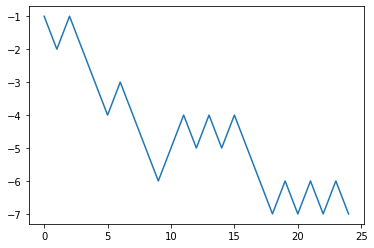

In [185]:
plt.plot(mean_a)

## Priviliged Classifier : Shifted Sigmoid
### $\hat y(x)\ = \frac{1}{1+e^{-(x+\theta)}}$ and Binary Cross-Entropy Loss : $\nabla_{\theta}\eta(\theta) = -\frac{1}{n}\nabla_{\theta}\Sigma_1^n (yln(y_{\theta})+(1-y)ln(1-y_{\theta})) = -\frac{1}{n}\Sigma_1^n y(1-y_{\theta})-(1-y)y_{\theta})$

## The labelling 

In [103]:
x = np.random.randn(100)
a = x[x>0]
b = x[x<0]

(array([1., 0., 0., 0., 0., 1., 0., 2., 0., 0., 0., 1., 1., 0., 3., 1., 1.,
        4., 1., 0., 2., 4., 3., 2., 0., 2., 6., 5., 2., 5.]),
 array([-2.92999303, -2.83290726, -2.73582149, -2.63873572, -2.54164996,
        -2.44456419, -2.34747842, -2.25039265, -2.15330688, -2.05622111,
        -1.95913534, -1.86204957, -1.76496381, -1.66787804, -1.57079227,
        -1.4737065 , -1.37662073, -1.27953496, -1.18244919, -1.08536342,
        -0.98827766, -0.89119189, -0.79410612, -0.69702035, -0.59993458,
        -0.50284881, -0.40576304, -0.30867728, -0.21159151, -0.11450574,
        -0.01741997]),
 <a list of 30 Patch objects>)

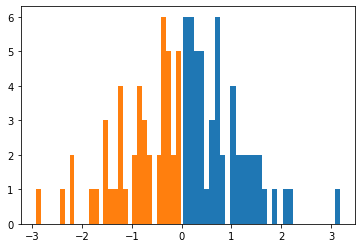

In [104]:
plt.hist(a,bins = 30)
plt.hist(b,bins = 30)

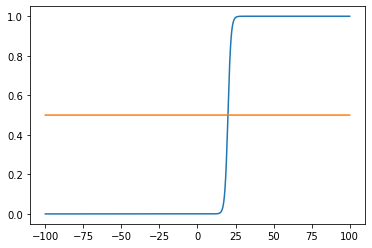

In [12]:
x = np.arange(-100,100,0.01)
y = 1/(1+np.exp(-x+20))
plt.plot(x,y)
plt.plot(x,0.5*np.ones(20000))

## For very high slope of the sigmoid, the expected derivative of 0-1 error w.r.t the threshold mean is equal to $\frac{d}{d\theta} |\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\theta} (e^{-\frac{-(t-\mu)^2}{2}})dt-1/2|= e^{-(\theta-\mu)^2/2}sign(\theta) $
## Our experiments are for finite slope of 1 and Binary Cross Entropy Loss function,  I think it will be useful to have the expected derivative update rule for this case as then it is a proper convex optimisation problem

### Example run of gradient descent for 10000 points from a single task

In [119]:
X=[]
mean = -1
x_curr = np.random.randn(10000)
x_curr = x_curr + mean
X.append(x_curr)
#     loss_curr = np.log(1+np.exp(-x_curr[ind_1]+ftl_param[i]))-np.log(np.exp(-x_curr[ind_0]+ftl_param[i])/(1+np.exp(-x_curr[ind_0]+ftl_param[i])))

loss_grad_btl = 0
theta_btl = btl_param[i]

loss = []
param = []

#gradient descent for btl 
for j in range(100):
    print('iteration:',j)
    print('loss_grad:',loss_grad_btl)
    print('param:',theta_btl)
    loss_grad_btl = 0
    for k,x in enumerate(X):
        print(k)
        ind_1 = x > -1
        ind_0 = x < -1
        # -sum(1-1/1+exp)[y=1]+sum(1+exp)[y=0]
        loss_grad_btl += (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_btl)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_btl)))))/10000
    theta_btl = theta_btl - step_size*(loss_grad_btl)
    loss_btl = (np.sum(np.log(1+np.exp(-(x_curr[ind_1]+theta_btl))))-np.sum(np.log(np.exp(-(x_curr[ind_0]+theta_btl))/(1+np.exp(-(x_curr[ind_0]+theta_btl))))))/10000

    loss.append(loss_btl)
    param.append(theta_btl)

iteration: 0
loss_grad: 0
param: 4.584016729020549
0
iteration: 1
loss_grad: 0.4590996915163553
param: 4.354466883262371
0
iteration: 2
loss_grad: 0.44961090904676465
param: 4.129661428738989
0
iteration: 3
loss_grad: 0.4384531209105635
param: 3.910434868283707
0
iteration: 4
loss_grad: 0.42553614633478326
param: 3.6976667951163154
0
iteration: 5
loss_grad: 0.41083496739685826
param: 3.4922493114178863
0
iteration: 6
loss_grad: 0.3944043494947739
param: 3.295047136670499
0
iteration: 7
loss_grad: 0.3763861586540644
param: 3.106854057343467
0
iteration: 8
loss_grad: 0.3570067818692636
param: 2.9283506664088352
0
iteration: 9
loss_grad: 0.3365639545222542
param: 2.760068689147708
0
iteration: 10
loss_grad: 0.3154046620203163
param: 2.6023663581375502
0
iteration: 11
loss_grad: 0.293897808873391
param: 2.455417453700855
0
iteration: 12
loss_grad: 0.2724063210608401
param: 2.3192142931704347
0
iteration: 13
loss_grad: 0.2512629947203884
param: 2.1935827958102405
0
iteration: 14
loss_grad: 

### Example Results (gradient descent on one task):
Loss is blue and goes to 0.5 (min BCE)
and weight is orange and goes to 1 (best weight) 

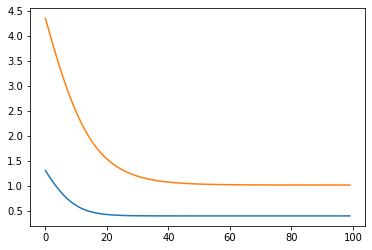

In [118]:
plt.plot(loss)
plt.plot(param)

In [174]:
ftl_param = [0]
btl_param = [0]
ftl_loss = [0]
ftrl_loss = [0]
btl_loss = [0]
X = []
comparator_param = 0
comparator_loss = 0
total_mean = 0

task: 0 mean: -1
iteration: 0
loss_grad: 0
param: 0
iteration: 1
loss_grad: -0.1953739815669801
param: 0.09768699078349005
iteration: 2
loss_grad: -0.17775912036051317
param: 0.18656655096374664
iteration: 3
loss_grad: -0.16132740866715545
param: 0.26723025529732436
iteration: 4
loss_grad: -0.14610566867301628
param: 0.34028308963383247
iteration: 5
loss_grad: -0.13208679356089073
param: 0.4063264864142778
iteration: 6
loss_grad: -0.11923822040593464
param: 0.46594559661724516
iteration: 7
loss_grad: -0.10750940720062827
param: 0.5197003002175593
iteration: 8
loss_grad: -0.09683805737642721
param: 0.5681193289057729
iteration: 9
loss_grad: -0.08715506432310335
param: 0.6116968610673246
iteration: 10
loss_grad: -0.07838828188002335
param: 0.6508910020073363
iteration: 11
loss_grad: -0.07046528965012441
param: 0.6861236468323985
iteration: 12
loss_grad: -0.06331533886504286
param: 0.7177813162649199
iteration: 13
loss_grad: -0.05687065497735207
param: 0.746216643753596
iteration: 14
loss

iteration: 52
loss_grad: -2.4407037039486656e-06
param: 1.4972586406142907
iteration: 53
loss_grad: -1.954760923045251e-06
param: 1.4972596179947522
iteration: 54
loss_grad: -1.5655690854543547e-06
param: 1.497260400779295
iteration: 55
loss_grad: -1.2538651310289861e-06
param: 1.4972610277118603
iteration: 56
loss_grad: -1.004221264408467e-06
param: 1.4972615298224925
iteration: 57
loss_grad: -8.042813559039352e-07
param: 1.4972619319631704
iteration: 58
loss_grad: -6.441493746039972e-07
param: 1.4972622540378577
iteration: 59
loss_grad: -5.158995838167035e-07
param: 1.4972625119876497
iteration: 60
loss_grad: -4.131842567256516e-07
param: 1.497262718579778
iteration: 61
loss_grad: -3.3091949547259247e-07
param: 1.4972628840395257
iteration: 62
loss_grad: -2.6503360354979133e-07
param: 1.4972630165563274
iteration: 63
loss_grad: -2.122655569369858e-07
param: 1.497263122689106
iteration: 64
loss_grad: -1.7000359969765455e-07
param: 1.4972632076909058
iteration: 65
loss_grad: -1.3615597

iteration: 32
loss_grad: -1.9248795959936338e-08
param: 1.4887169477071864
iteration: 33
loss_grad: -1.1595938417818807e-08
param: 1.4887169535051556
iteration: 34
loss_grad: -6.985672554304934e-09
param: 1.488716956997992
iteration: 35
loss_grad: -4.2083373036350125e-09
param: 1.4887169591021605
iteration: 36
loss_grad: -2.53520386628292e-09
param: 1.4887169603697625
iteration: 37
loss_grad: -1.5272678122180139e-09
param: 1.4887169611333964
iteration: 38
loss_grad: -9.200628453553961e-10
param: 1.4887169615934277
iteration: 39
loss_grad: -5.542680620029827e-10
param: 1.4887169618705618
iteration: 40
loss_grad: -3.3390441800396076e-10
param: 1.488716962037514
iteration: 41
loss_grad: -2.011520672251521e-10
param: 1.48871696213809
iteration: 42
loss_grad: -1.2117890024754274e-10
param: 1.4887169621986795
iteration: 43
loss_grad: -7.300104964969023e-11
param: 1.4887169622351801
iteration: 44
loss_grad: -4.3977432806485695e-11
param: 1.4887169622571688
iteration: 45
loss_grad: -2.64932104

iteration: 65
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 66
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 67
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 68
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 69
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 70
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 71
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 72
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 73
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 74
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 75
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 76
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 77
loss_grad: -1.1102230246251565e-16
param: 1.7813686619450007
iteration: 78
loss_grad: 

iteration: 20
loss_grad: -1.4664880698678218e-09
param: 2.2708360335746267
iteration: 21
loss_grad: -5.516887779943858e-10
param: 2.270836033850471
iteration: 22
loss_grad: -2.0754398200040214e-10
param: 2.270836033954243
iteration: 23
loss_grad: -7.807751667421314e-11
param: 2.2708360339932816
iteration: 24
loss_grad: -2.937278198444915e-11
param: 2.270836034007968
iteration: 25
loss_grad: -1.1049966497367336e-11
param: 2.270836034013493
iteration: 26
loss_grad: -4.156952559952742e-12
param: 2.2708360340155713
iteration: 27
loss_grad: -1.5639434192138424e-12
param: 2.2708360340163534
iteration: 28
loss_grad: -5.881684028707923e-13
param: 2.2708360340166474
iteration: 29
loss_grad: -2.2137847111025621e-13
param: 2.270836034016758
iteration: 30
loss_grad: -8.359979375427429e-14
param: 2.2708360340167997
iteration: 31
loss_grad: -3.144706717250756e-14
param: 2.270836034016815
iteration: 32
loss_grad: -1.2073675392798577e-14
param: 2.2708360340168214
iteration: 33
loss_grad: -4.3298697960

iteration: 48
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 49
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 50
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 51
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 52
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 53
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 54
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 55
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 56
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 57
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 58
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 59
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 60
loss_grad: 5.551115123125783e-17
param: 2.495392722985777
iteration: 61
loss_grad: 5.551115123125783e-17
param: 2.49539272

iteration: 94
loss_grad: -3.885780586188048e-16
param: 2.764653228964636
iteration: 95
loss_grad: -3.885780586188048e-16
param: 2.764653228964636
iteration: 96
loss_grad: -3.885780586188048e-16
param: 2.764653228964636
iteration: 97
loss_grad: -3.885780586188048e-16
param: 2.764653228964636
iteration: 98
loss_grad: -3.885780586188048e-16
param: 2.764653228964636
iteration: 99
loss_grad: -3.885780586188048e-16
param: 2.764653228964636
task: 9 mean: -6
iteration: 0
loss_grad: 0
param: 2.764653228964636
iteration: 1
loss_grad: -0.44685611564136873
param: 2.9880812867853206
iteration: 2
loss_grad: -0.10410575919165838
param: 3.04013416638115
iteration: 3
loss_grad: -0.02426693715612349
param: 3.0522676349592115
iteration: 4
loss_grad: -0.005665347350747585
param: 3.0551003086345854
iteration: 5
loss_grad: -0.0013232067087879384
param: 3.0557619119889794
iteration: 6
loss_grad: -0.0003090828426216552
param: 3.05591645341029
iteration: 7
loss_grad: -7.219929470164699e-05
param: 3.05595255305

iteration: 25
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 26
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 27
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 28
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 29
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 30
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 31
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 32
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 33
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 34
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 35
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 36
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 37
loss_grad: 1.1102230246251565e-16
param: 3.2577838386456697
iteration: 38
loss_grad: 1.11022302462

iteration: 44
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 45
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 46
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 47
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 48
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 49
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 50
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 51
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 52
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 53
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 54
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 55
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 56
loss_grad: 2.220446049250313e-16
param: 3.3404375081731326
iteration: 57
loss_grad: 2.220446049250313e-16
para

iteration: 78
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 79
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 80
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 81
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 82
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 83
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 84
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 85
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 86
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 87
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 88
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 89
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 90
loss_grad: -2.220446049250313e-16
param: 3.48871216914229
iteration: 91
loss_grad: -2.220446049250313e-16
param: 3.4887121

iteration: 2
loss_grad: 0.04975339183881239
param: 3.6509493636339414
iteration: 3
loss_grad: -0.008988180219741349
param: 3.6554434537438123
iteration: 4
loss_grad: 0.0016202156536987977
param: 3.654633345916963
iteration: 5
loss_grad: -0.00029218032258082616
param: 3.6547794360782535
iteration: 6
loss_grad: 5.268626021237566e-05
param: 3.6547530929481473
iteration: 7
loss_grad: -9.500566655662457e-06
param: 3.6547578432314753
iteration: 8
loss_grad: 1.7131706024908766e-06
param: 3.654756986646174
iteration: 9
loss_grad: -3.0892418118044773e-07
param: 3.6547571411082647
iteration: 10
loss_grad: 5.5706152468637526e-08
param: 3.6547571132551884
iteration: 11
loss_grad: -1.0045104026357166e-08
param: 3.6547571182777405
iteration: 12
loss_grad: 1.8113640032346723e-09
param: 3.6547571173720583
iteration: 13
loss_grad: -3.2663066695803877e-10
param: 3.6547571175353735
iteration: 14
loss_grad: 5.889810861248179e-11
param: 3.6547571175059246
iteration: 15
loss_grad: -1.0620171408959322e-11
pa

iteration: 16
loss_grad: 4.4886842853752995e-10
param: 3.6837701485124077
iteration: 17
loss_grad: -1.2711259822495435e-10
param: 3.683770148575964
iteration: 18
loss_grad: 3.5996039482455444e-11
param: 3.683770148557966
iteration: 19
loss_grad: -1.0193512700595875e-11
param: 3.6837701485630627
iteration: 20
loss_grad: 2.8872182422645665e-12
param: 3.683770148561619
iteration: 21
loss_grad: -8.178457910901216e-13
param: 3.683770148562028
iteration: 22
loss_grad: 2.313704783318826e-13
param: 3.683770148561912
iteration: 23
loss_grad: -6.568356969438582e-14
param: 3.683770148561945
iteration: 24
loss_grad: 1.8346435481930712e-14
param: 3.6837701485619356
iteration: 25
loss_grad: -5.9674487573602164e-15
param: 3.6837701485619387
iteration: 26
loss_grad: 2.5396351688300456e-15
param: 3.6837701485619374
iteration: 27
loss_grad: -1.0408340855860843e-15
param: 3.683770148561938
iteration: 28
loss_grad: -2.7755575615628914e-17
param: 3.683770148561938
iteration: 29
loss_grad: -2.77555756156289

iteration: 47
loss_grad: -4.996003610813204e-16
param: 3.772887771097468
iteration: 48
loss_grad: 8.049116928532385e-16
param: 3.7728877710974675
iteration: 49
loss_grad: -4.996003610813204e-16
param: 3.772887771097468
iteration: 50
loss_grad: 8.049116928532385e-16
param: 3.7728877710974675
iteration: 51
loss_grad: -4.996003610813204e-16
param: 3.772887771097468
iteration: 52
loss_grad: 8.049116928532385e-16
param: 3.7728877710974675
iteration: 53
loss_grad: -4.996003610813204e-16
param: 3.772887771097468
iteration: 54
loss_grad: 8.049116928532385e-16
param: 3.7728877710974675
iteration: 55
loss_grad: -4.996003610813204e-16
param: 3.772887771097468
iteration: 56
loss_grad: 8.049116928532385e-16
param: 3.7728877710974675
iteration: 57
loss_grad: -4.996003610813204e-16
param: 3.772887771097468
iteration: 58
loss_grad: 8.049116928532385e-16
param: 3.7728877710974675
iteration: 59
loss_grad: -4.996003610813204e-16
param: 3.772887771097468
iteration: 60
loss_grad: 8.049116928532385e-16
para

iteration: 66
loss_grad: 7.216449660063518e-16
param: 3.9034010117169817
iteration: 67
loss_grad: -5.551115123125783e-16
param: 3.903401011716982
iteration: 68
loss_grad: 7.216449660063518e-16
param: 3.9034010117169817
iteration: 69
loss_grad: -5.551115123125783e-16
param: 3.903401011716982
iteration: 70
loss_grad: 7.216449660063518e-16
param: 3.9034010117169817
iteration: 71
loss_grad: -5.551115123125783e-16
param: 3.903401011716982
iteration: 72
loss_grad: 7.216449660063518e-16
param: 3.9034010117169817
iteration: 73
loss_grad: -5.551115123125783e-16
param: 3.903401011716982
iteration: 74
loss_grad: 7.216449660063518e-16
param: 3.9034010117169817
iteration: 75
loss_grad: -5.551115123125783e-16
param: 3.903401011716982
iteration: 76
loss_grad: 7.216449660063518e-16
param: 3.9034010117169817
iteration: 77
loss_grad: -5.551115123125783e-16
param: 3.903401011716982
iteration: 78
loss_grad: 7.216449660063518e-16
param: 3.9034010117169817
iteration: 79
loss_grad: -5.551115123125783e-16
par

iteration: 81
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 82
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 83
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 84
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 85
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 86
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 87
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 88
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 89
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 90
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 91
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 92
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 93
loss_grad: -2.7755575615628914e-16
param: 4.053845609488116
iteration: 94
loss_grad: -2.7755575615

iteration: 6
loss_grad: 0.026104851137768503
param: 4.29257103528776
iteration: 7
loss_grad: -0.014981228650963407
param: 4.300061649613242
iteration: 8
loss_grad: 0.008595636848752475
param: 4.295763831188865
iteration: 9
loss_grad: -0.004932470185371907
param: 4.298230066281551
iteration: 10
loss_grad: 0.002830213369285406
param: 4.296814959596908
iteration: 11
loss_grad: -0.0016240230125996735
param: 4.297626971103208
iteration: 12
loss_grad: 0.0009318686843090562
param: 4.297161036761053
iteration: 13
loss_grad: -0.0005347161117916777
param: 4.297428394816949
iteration: 14
loss_grad: 0.00030682332753201313
param: 4.297274983153183
iteration: 15
loss_grad: -0.0001760578768941201
param: 4.29736301209163
iteration: 16
loss_grad: 0.00010102326713706811
param: 4.2973125004580615
iteration: 17
loss_grad: -5.7967959149363146e-05
param: 4.297341484437636
iteration: 18
loss_grad: 3.326245023055341e-05
param: 4.297324853212521
iteration: 19
loss_grad: -1.908625313246093e-05
param: 4.29733439

iteration: 24
loss_grad: 1.4967710803837075e-05
param: 4.393608771762362
iteration: 25
loss_grad: -9.707611767384439e-06
param: 4.393613625568245
iteration: 26
loss_grad: 6.296067361466484e-06
param: 4.393610477534565
iteration: 27
loss_grad: -4.083441746960403e-06
param: 4.393612519255438
iteration: 28
loss_grad: 2.648398554294662e-06
param: 4.3936111950561605
iteration: 29
loss_grad: -1.7176723861034304e-06
param: 4.393612053892354
iteration: 30
loss_grad: 1.1140311049762097e-06
param: 4.393611496876801
iteration: 31
loss_grad: -7.225273750410821e-07
param: 4.393611858140488
iteration: 32
loss_grad: 4.686097187511784e-07
param: 4.393611623835629
iteration: 33
loss_grad: -3.0392629635223045e-07
param: 4.393611775798777
iteration: 34
loss_grad: 1.9711753607154492e-07
param: 4.393611677240009
iteration: 35
loss_grad: -1.2784455988290588e-07
param: 4.393611741162289
iteration: 36
loss_grad: 8.291617081823688e-08
param: 4.393611699704204
iteration: 37
loss_grad: -5.3776955943884985e-08
pa

iteration: 52
loss_grad: 3.9480658742263586e-09
param: 4.513300171177896
iteration: 53
loss_grad: -2.749911576227504e-09
param: 4.513300172552852
iteration: 54
loss_grad: 1.9153731933840845e-09
param: 4.513300171595166
iteration: 55
loss_grad: -1.3340964999386529e-09
param: 4.513300172262214
iteration: 56
loss_grad: 9.292267511007424e-10
param: 4.513300171797601
iteration: 57
loss_grad: -6.472252178646443e-10
param: 4.513300172121213
iteration: 58
loss_grad: 4.5080467137026403e-10
param: 4.5133001718958115
iteration: 59
loss_grad: -3.139929427575794e-10
param: 4.513300172052808
iteration: 60
loss_grad: 2.1870183442018742e-10
param: 4.513300171943457
iteration: 61
loss_grad: -1.5233120320701232e-10
param: 4.513300172019623
iteration: 62
loss_grad: 1.0610318179615774e-10
param: 4.513300171966571
iteration: 63
loss_grad: -7.390338341295433e-11
param: 4.513300172003523
iteration: 64
loss_grad: 5.147532400329169e-11
param: 4.513300171977785
iteration: 65
loss_grad: -3.585376440184973e-11
pa

iteration: 75
loss_grad: -2.462272719050418e-09
param: 4.593460042462694
iteration: 76
loss_grad: 1.9159538955371147e-09
param: 4.593460041504717
iteration: 77
loss_grad: -1.4908497769638984e-09
param: 4.593460042250142
iteration: 78
loss_grad: 1.1600670979383665e-09
param: 4.593460041670109
iteration: 79
loss_grad: -9.026782654686372e-10
param: 4.593460042121448
iteration: 80
loss_grad: 7.023978620956939e-10
param: 4.593460041770249
iteration: 81
loss_grad: -5.465534691495577e-10
param: 4.593460042043525
iteration: 82
loss_grad: 4.2528591759349865e-10
param: 4.593460041830882
iteration: 83
loss_grad: -3.3092711904103567e-10
param: 4.593460041996345
iteration: 84
loss_grad: 2.5750218624054355e-10
param: 4.593460041867594
iteration: 85
loss_grad: -2.0036944325951822e-10
param: 4.593460041967779
iteration: 86
loss_grad: 1.5591200552833584e-10
param: 4.593460041889823
iteration: 87
loss_grad: -1.2131917692670413e-10
param: 4.5934600419504825
iteration: 88
loss_grad: 9.44021527615746e-11
p

iteration: 95
loss_grad: -1.2920474190547537e-08
param: 4.6991524949771195
iteration: 96
loss_grad: 1.0758634094720776e-08
param: 4.699152489597802
iteration: 97
loss_grad: -8.958512487389214e-09
param: 4.699152494077058
iteration: 98
loss_grad: 7.459583006852455e-09
param: 4.699152490347267
iteration: 99
loss_grad: -6.2114543508684505e-09
param: 4.699152493452994


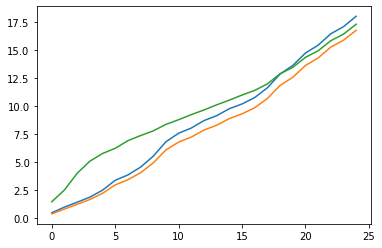

In [175]:
step_size = 0.5
for (i,mean) in enumerate(mean_a):
    print('task:',i,'mean:',mean)
    x_curr = np.random.randn(10000)

    x_curr = x_curr + mean
    
    X.append(x_curr)
#     loss_curr = np.log(1+np.exp(-x_curr[ind_1]+ftl_param[i]))-np.log(np.exp(-x_curr[ind_0]+ftl_param[i])/(1+np.exp(-x_curr[ind_0]+ftl_param[i])))

    
    loss_grad_ftl = 0
    loss_grad_btl = 0

    theta_ftl = ftl_param[i]
    theta_btl = btl_param[i]
    
#     print('loss',loss_curr)
    #gradient descent for btl and ftl (without final task)
    for j in range(100):
        print('iteration:',j)
        print('loss_grad:',loss_grad_btl)
        print('param:',theta_btl)
        loss_grad_ftl = 0
        loss_grad_btl = 0
        for k,x in enumerate(X):
#             print(k)
            ind_1 = x > mean_a[k]
            ind_0 = x < mean_a[k]
            # -sum(1-1/1+exp)[y=1]+sum(1+exp)[y=0]
            loss_grad_btl += (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_btl)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_btl)))))/10000
            loss_grad_ftl += (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_ftl)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_ftl)))))/10000
#             print(np.sum(np.log(1+np.exp(-x_curr[ind_1]+ftl_param[i])))-np.sum(np.log(np.exp(-x_curr[ind_0]+ftl_param[i])/(1+np.exp(-x_curr[ind_0]+ftl_param[i])))))
        loss_grad_ftl-= (-np.sum((1-1/(1+np.exp(-(x[ind_1]+theta_ftl)))))+np.sum(1/(1+np.exp(-(x[ind_0]+theta_ftl)))))/10000
        
        theta_ftl = theta_ftl - step_size*(loss_grad_ftl)
        theta_btl = theta_btl - step_size*(loss_grad_btl)
        
    ftl_param.append(theta_ftl)
    btl_param.append(theta_btl)        
    
    ind_1 = x_curr > mean
    ind_0 = x_curr < mean 
#     print(x_curr[ind_0],1/(1+np.exp(-(x_curr[ind_0]+theta_btl))))
#     print(x_curr[ind_1],1/(1+np.exp(-(x_curr[ind_0]+theta_btl))))
    
    ftl_curr_loss = (np.sum(np.log(1+np.exp(-(x_curr[ind_1]+ftl_param[i+1]))))-np.sum(np.log(np.exp(-(x_curr[ind_0]+ftl_param[i+1]))/(1+np.exp(-(x_curr[ind_0]+ftl_param[i+1]))))))/10000
    btl_curr_loss = (np.sum(np.log(1+np.exp(-(x_curr[ind_1]+btl_param[i+1]))))-np.sum(np.log(np.exp(-(x_curr[ind_0]+btl_param[i+1]))/(1+np.exp(-(x_curr[ind_0]+btl_param[i+1]))))))/10000


    
    ftl_loss.append(ftl_curr_loss)
    btl_loss.append(btl_curr_loss)
    
#     temp_mean = np.mean(x)
#     ftl_param = total_mean/(i+1)
#     ftl_loss.append(mean-ftl_param) 
#     total_mean += temp_mean
#     btl_param = total_mean/i
comparator_param = btl_param[-1]
loss_comp = []
for k,x in enumerate(X):
    ind_1 = x > mean_a[k]
    ind_0 = x < mean_a[k]    
    loss_comp.append((np.sum(np.log(1+np.exp(-(x[ind_1]+comparator_param))))-np.sum(np.log(np.exp(-(x[ind_0]+comparator_param))/(1+np.exp(-(x[ind_0]+comparator_param))))))/10000)
plt.plot(np.cumsum(ftl_loss)[1:])
plt.plot(np.cumsum(btl_loss)[1:])
plt.plot(np.cumsum(np.array(loss_comp)))

## The ftl, btl and comparator losses

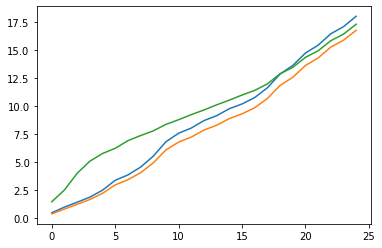

In [176]:
plt.plot(np.cumsum(ftl_loss)[1:])
plt.plot(np.cumsum(btl_loss)[1:])
plt.plot(np.cumsum(np.array(loss_comp)))

## Ftl and Btl regret. (0 for comparator)

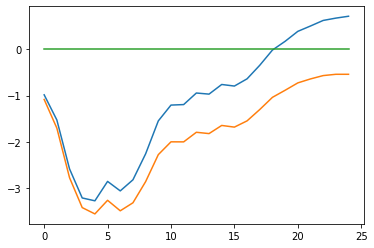

In [179]:
plt.plot(np.cumsum(ftl_loss)[1:]-np.cumsum(np.array(loss_comp)))
plt.plot(np.cumsum(btl_loss)[1:]-np.cumsum(np.array(loss_comp)))
plt.plot(np.zeros(25))

## The ftl, btl and comparator parameters and the (negatoive of )mean

Text(0.5, 1.0, 'Parameters and negative Mean')

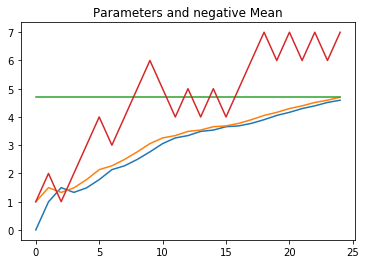

In [187]:
plt.plot(np.array(ftl_param[1:]))
plt.plot(np.array(btl_param[1:]))
plt.plot(comparator_param*np.ones(25))
plt.plot(-mean_a)
plt.title('Parameters and negative Mean')